In [1]:
#SVM-SVC

In [2]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline

In [3]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df2 = df.drop(columns=['month','day','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','dayfri','monthapr','monthaug','monthdec','monthsep','daymon','daysat','daysun','daythu','daytue','daywed'])
df2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [5]:
df2.describe

<bound method NDFrame.describe of      FFMC    DMC     DC   ISI  temp  RH  wind  rain   area size_category
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00         small
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00         small
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00         small
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00         small
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00         small
..    ...    ...    ...   ...   ...  ..   ...   ...    ...           ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44         large
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29         large
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16         large
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00         small
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00         small

[517 rows x 10 columns]>

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 40.5+ KB


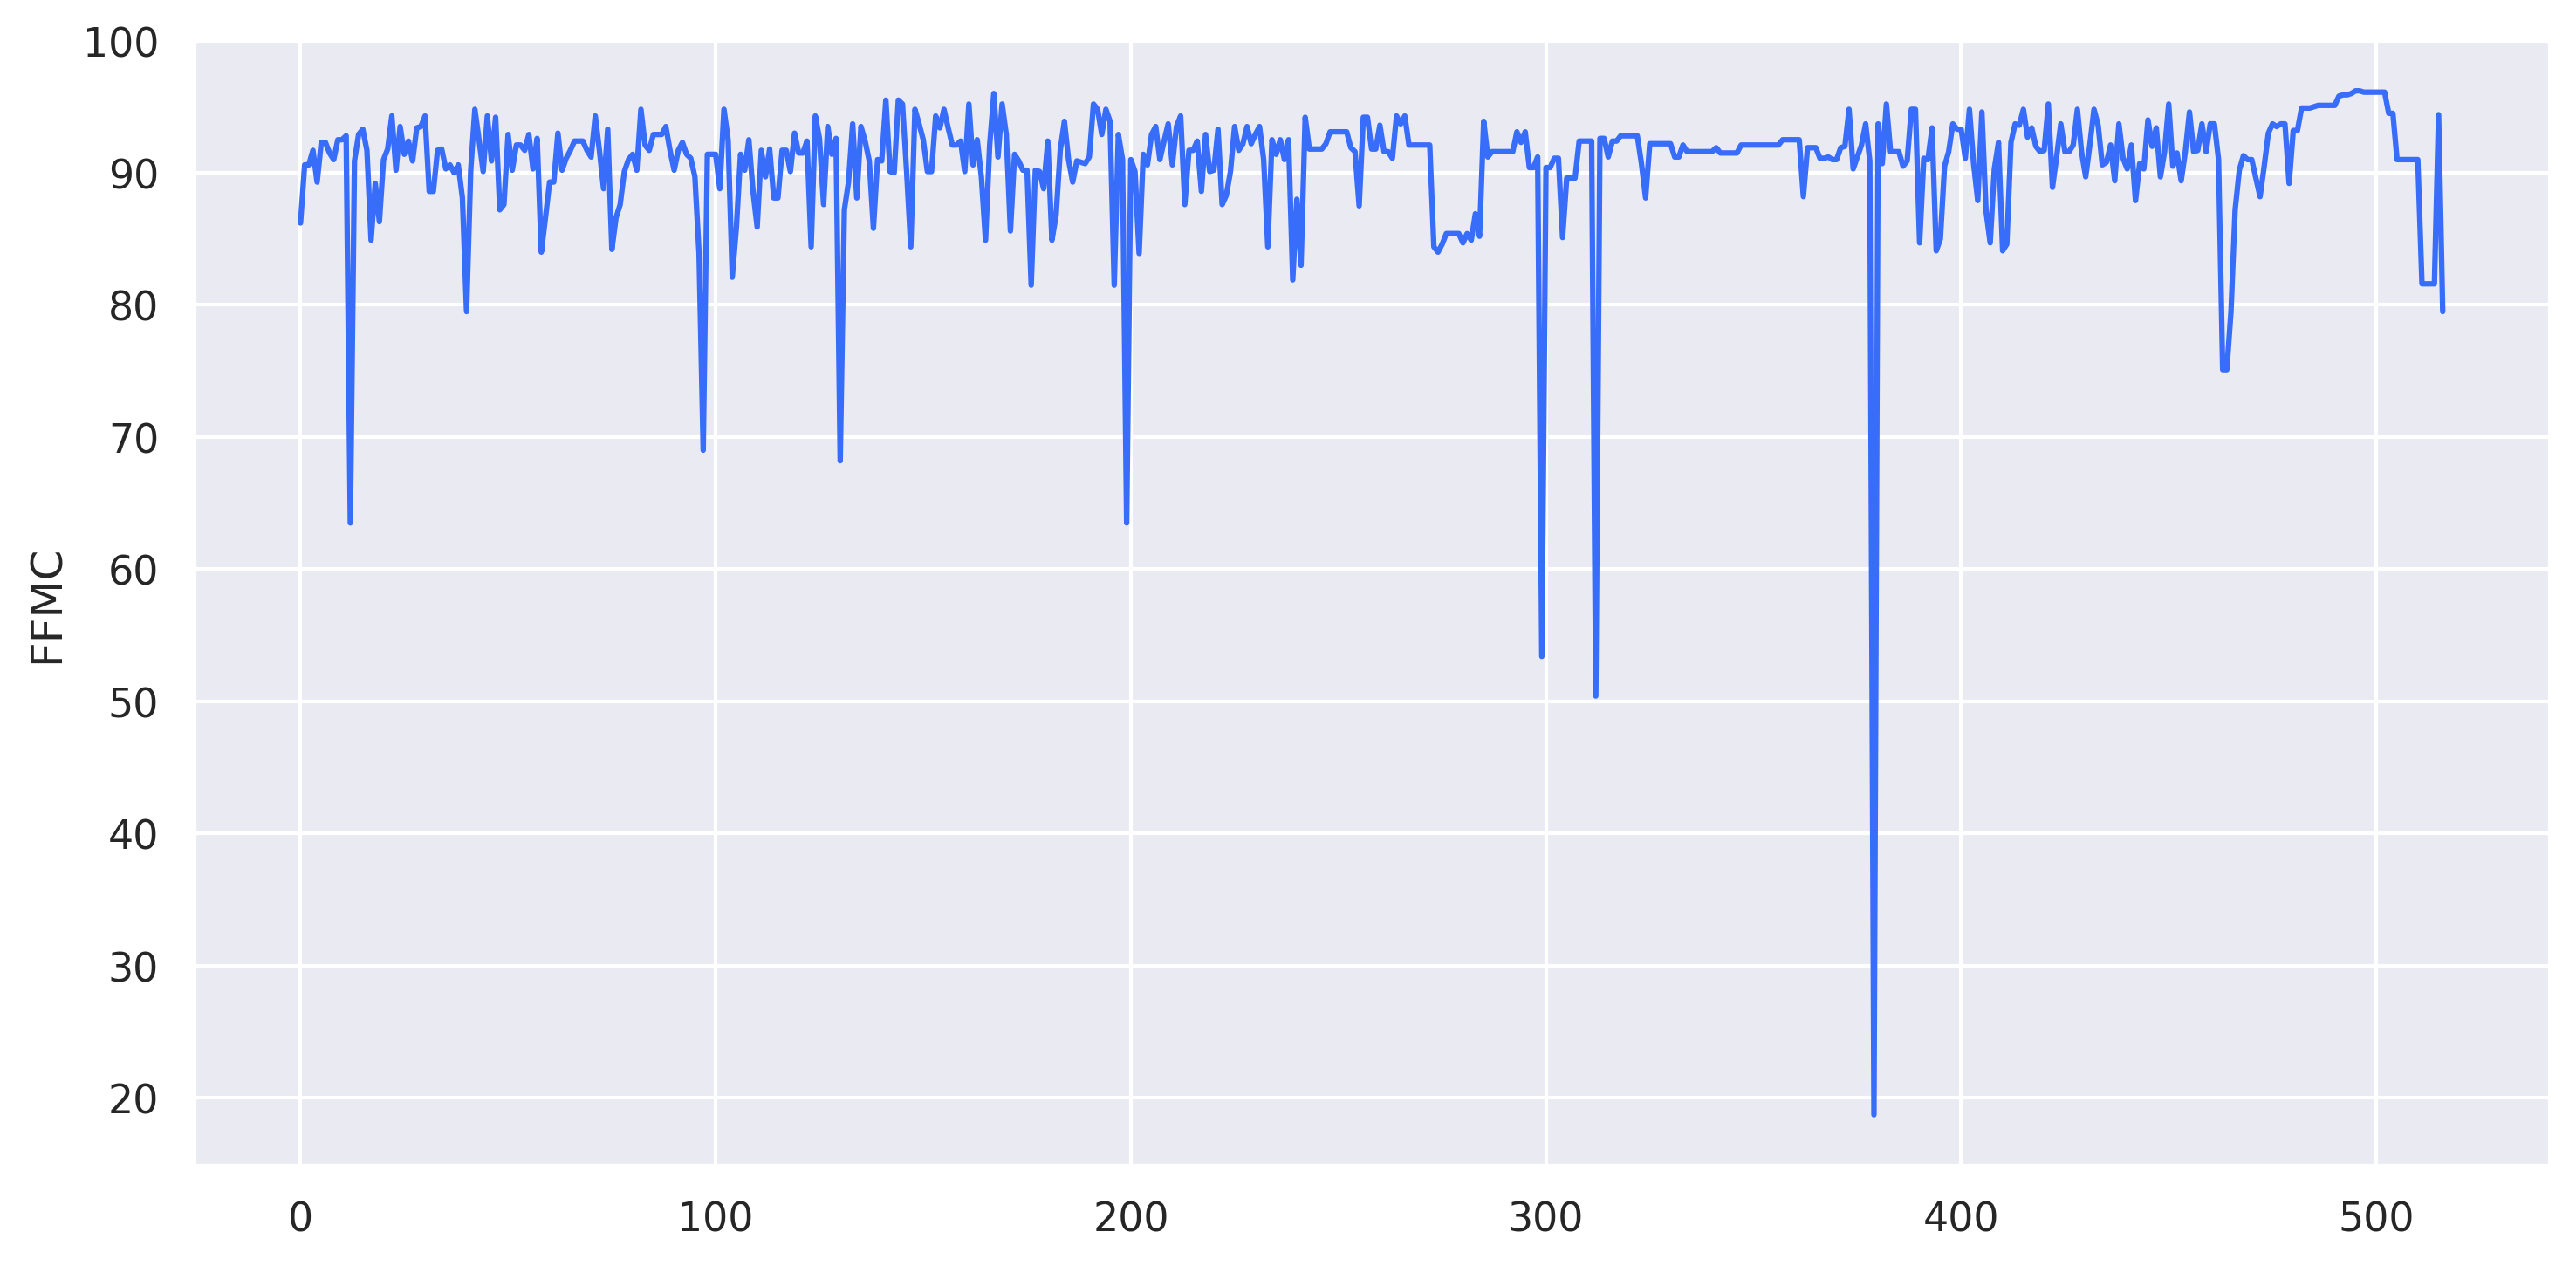

In [7]:
sns.lineplot(df2['FFMC'])
plt.tight_layout()
plt.show()

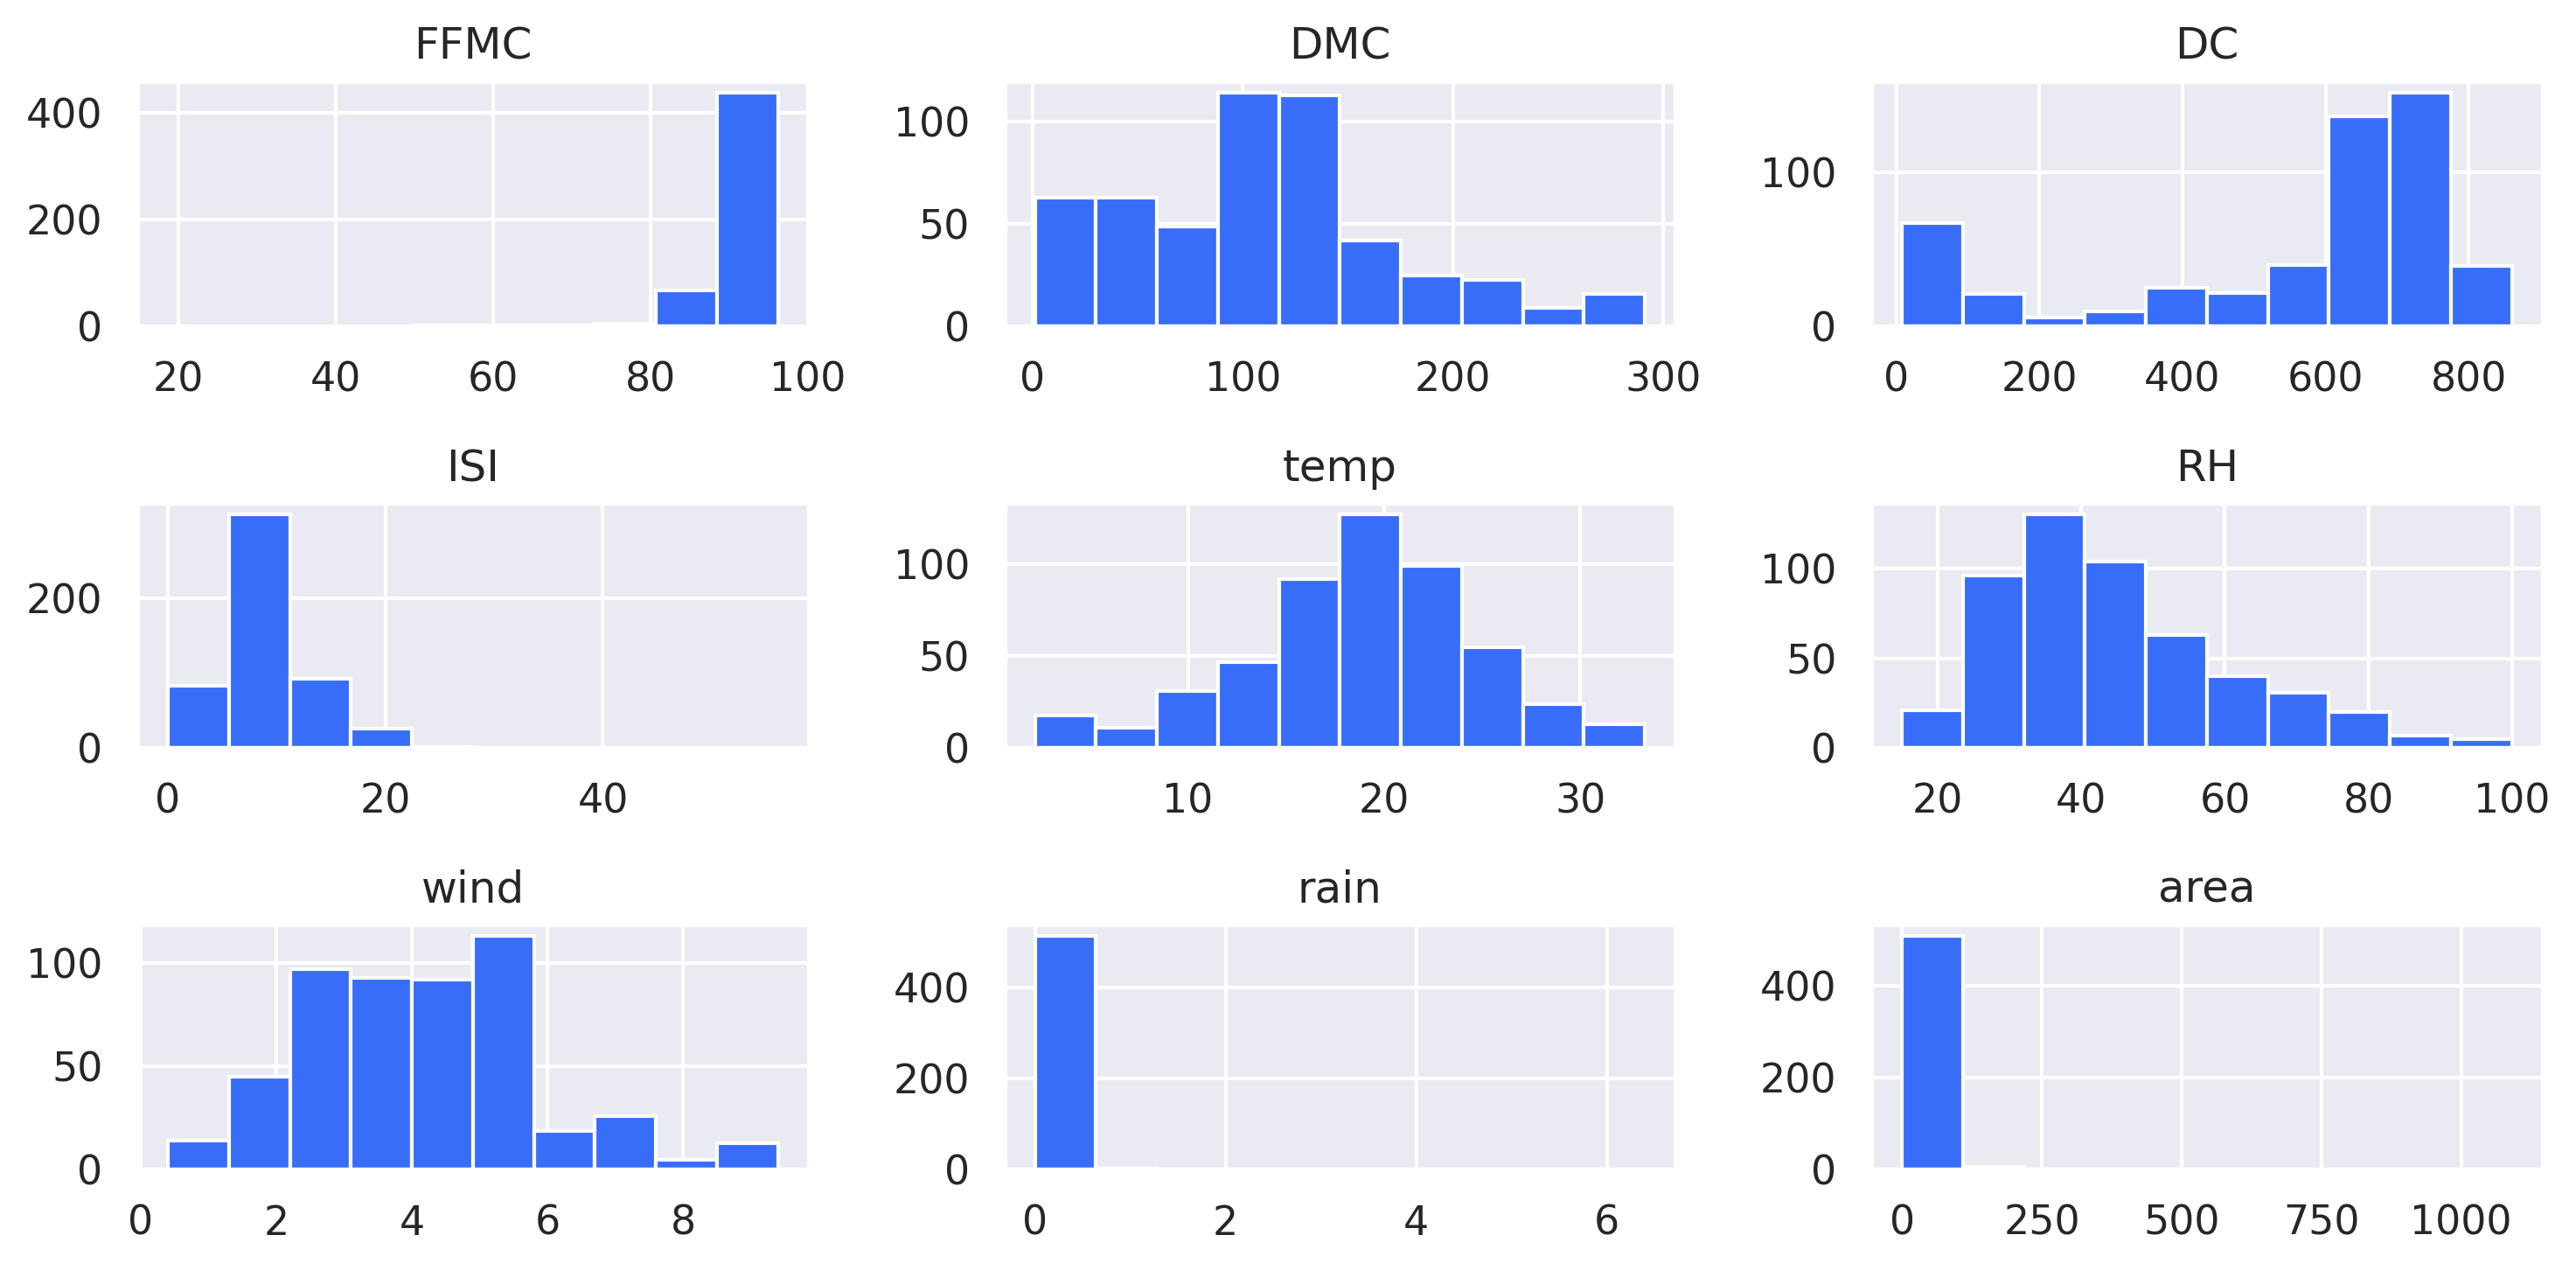

In [8]:
df2.hist()
plt.tight_layout()
plt.show()

In [9]:
x = df2.iloc[:,:-1]
y = df2['size_category']

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
svm = SVC()
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       large       1.00      0.17      0.29        29
       small       0.76      1.00      0.86        75

    accuracy                           0.77       104
   macro avg       0.88      0.59      0.58       104
weighted avg       0.83      0.77      0.70       104



In [14]:
svm.score(xtrain,ytrain),svm.score(xtest,ytest)

(0.7578692493946732, 0.7692307692307693)

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
svm = SVC(kernel='poly')
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [18]:
svm.score(xtrain,ytrain),svm.score(xtest,ytest)

(0.8087167070217918, 0.75)

In [19]:
#Hyperparameter Tunning

In [20]:
params = {
    'kernel':['poly','rbf','linear','sigmoid'],
    'C':[0.1,0.001,0.0001,1,10],
    'gamma':[0.1,0.001,6,1,10]
}

In [21]:
grid = GridSearchCV(SVC(),param_grid=params,verbose=-1)

In [22]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 0.0001, 1, 10],
                         'gamma': [0.1, 0.001, 6, 1, 10],
                         'kernel': ['poly', 'rbf', 'linear', 'sigmoid']},
             verbose=-1)

In [23]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [24]:
svm = SVC(kernel='rbf',C=10,gamma=0.001)

In [25]:
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [26]:
svm.score(xtrain,ytrain),svm.score(xtest,ytest)

(0.7554479418886199, 0.7596153846153846)

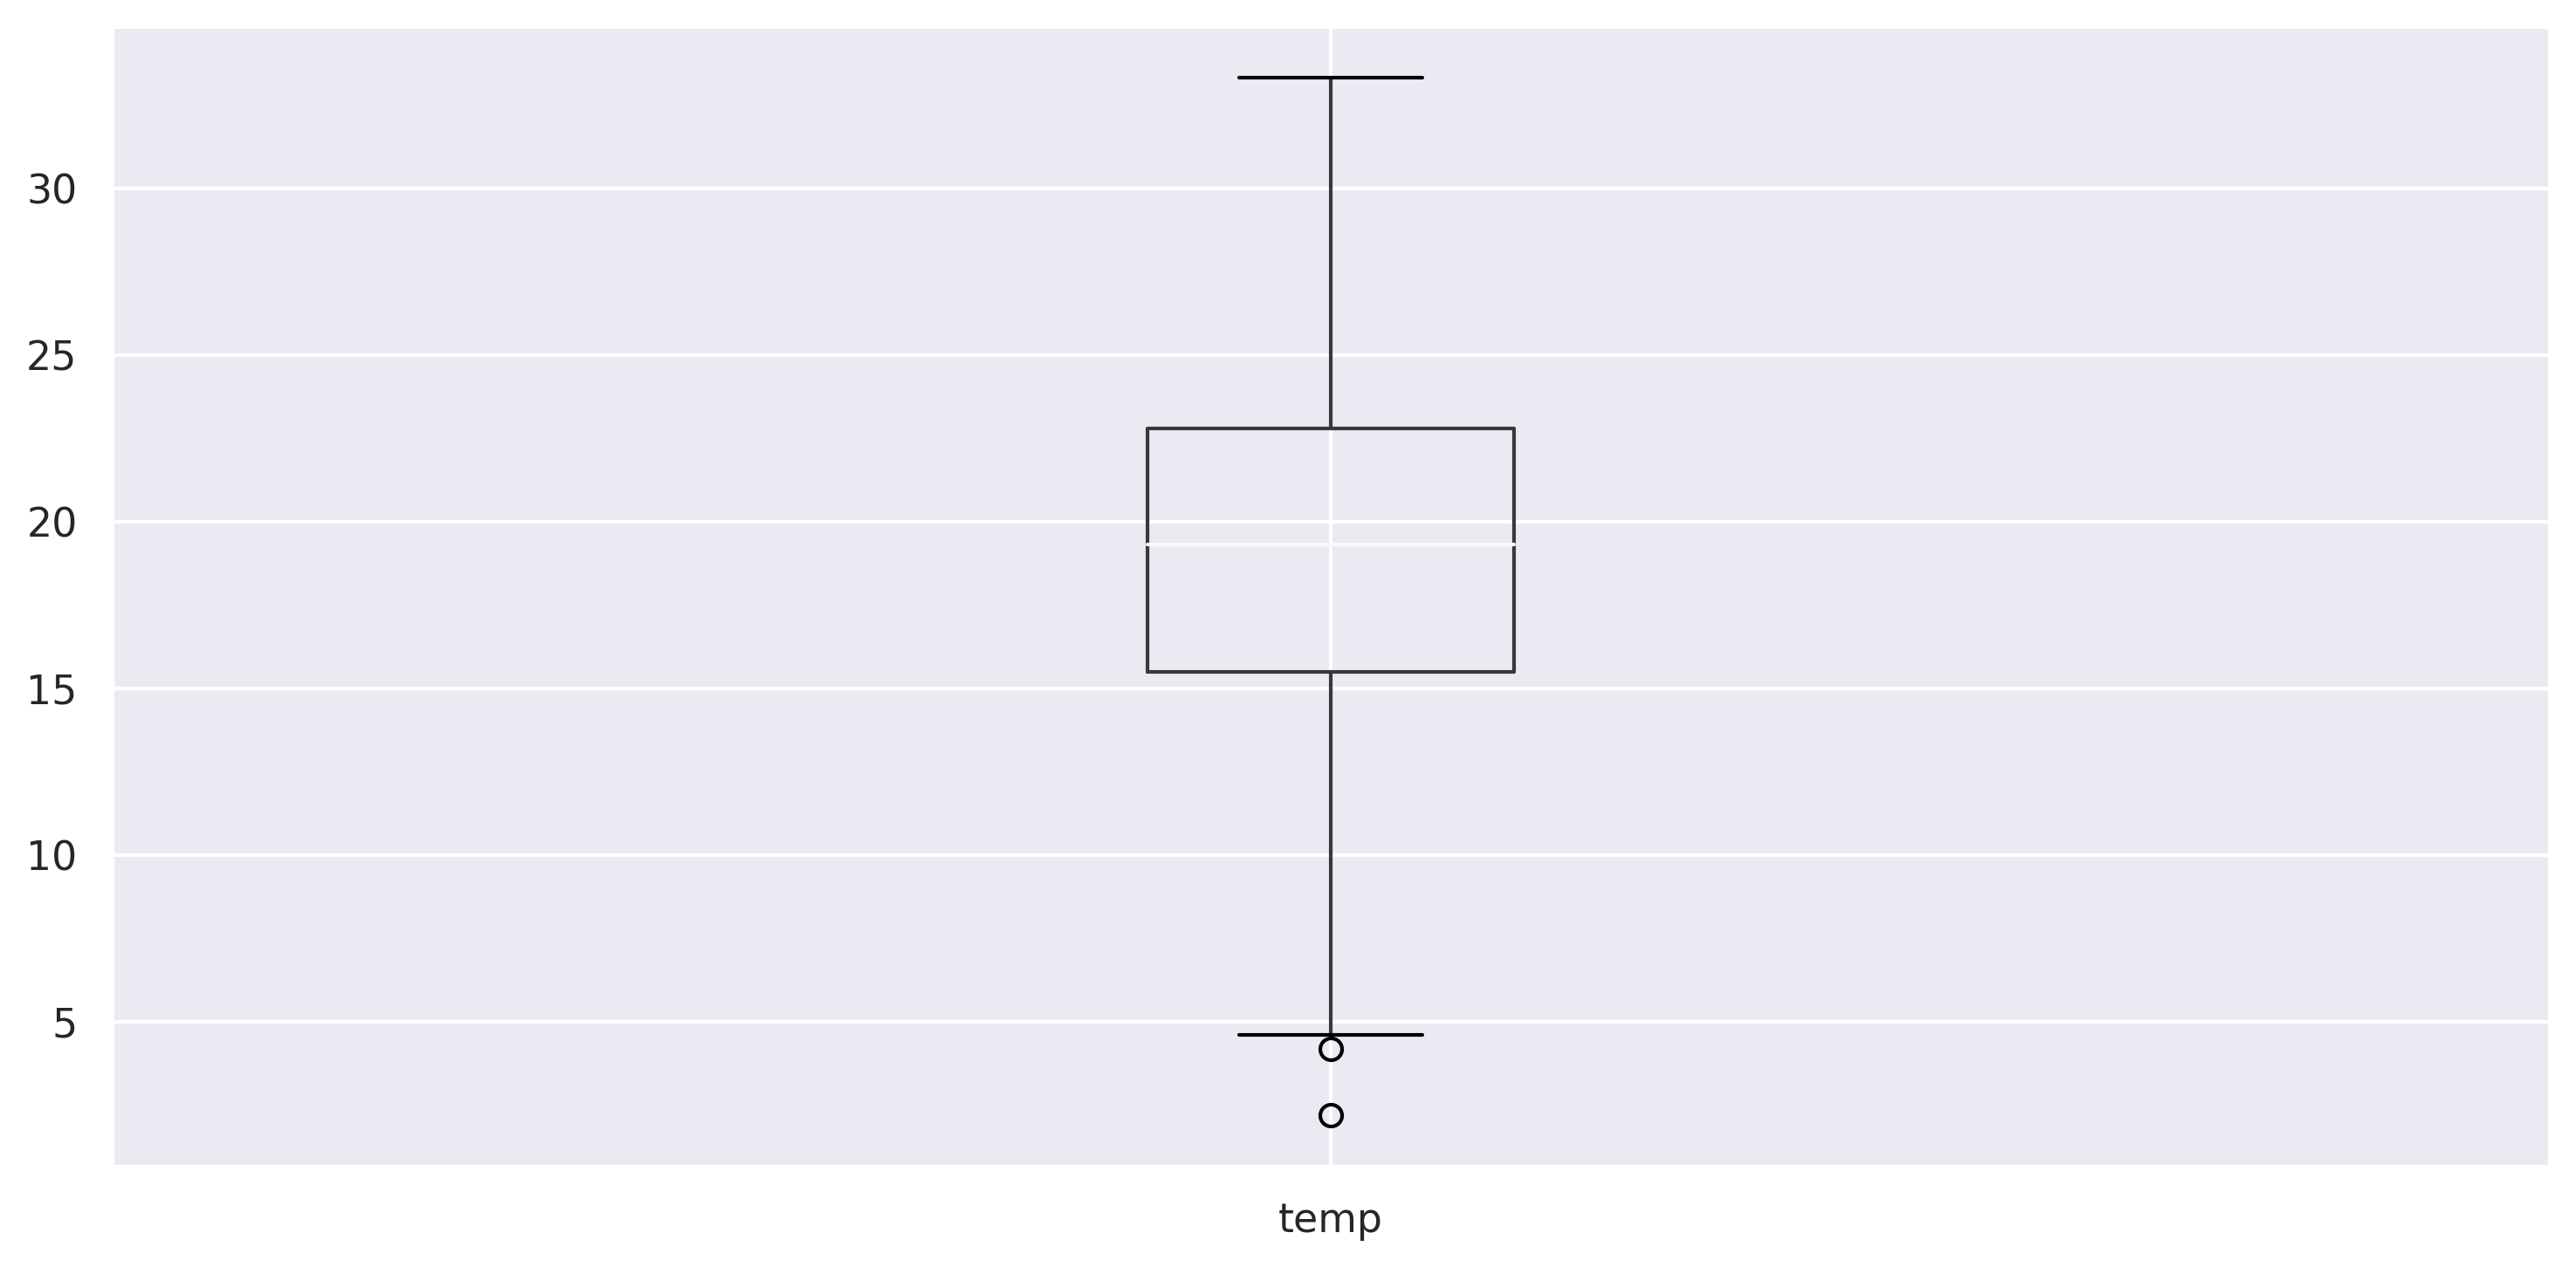

In [27]:
df2.boxplot('temp')
plt.tight_layout()
plt.show()

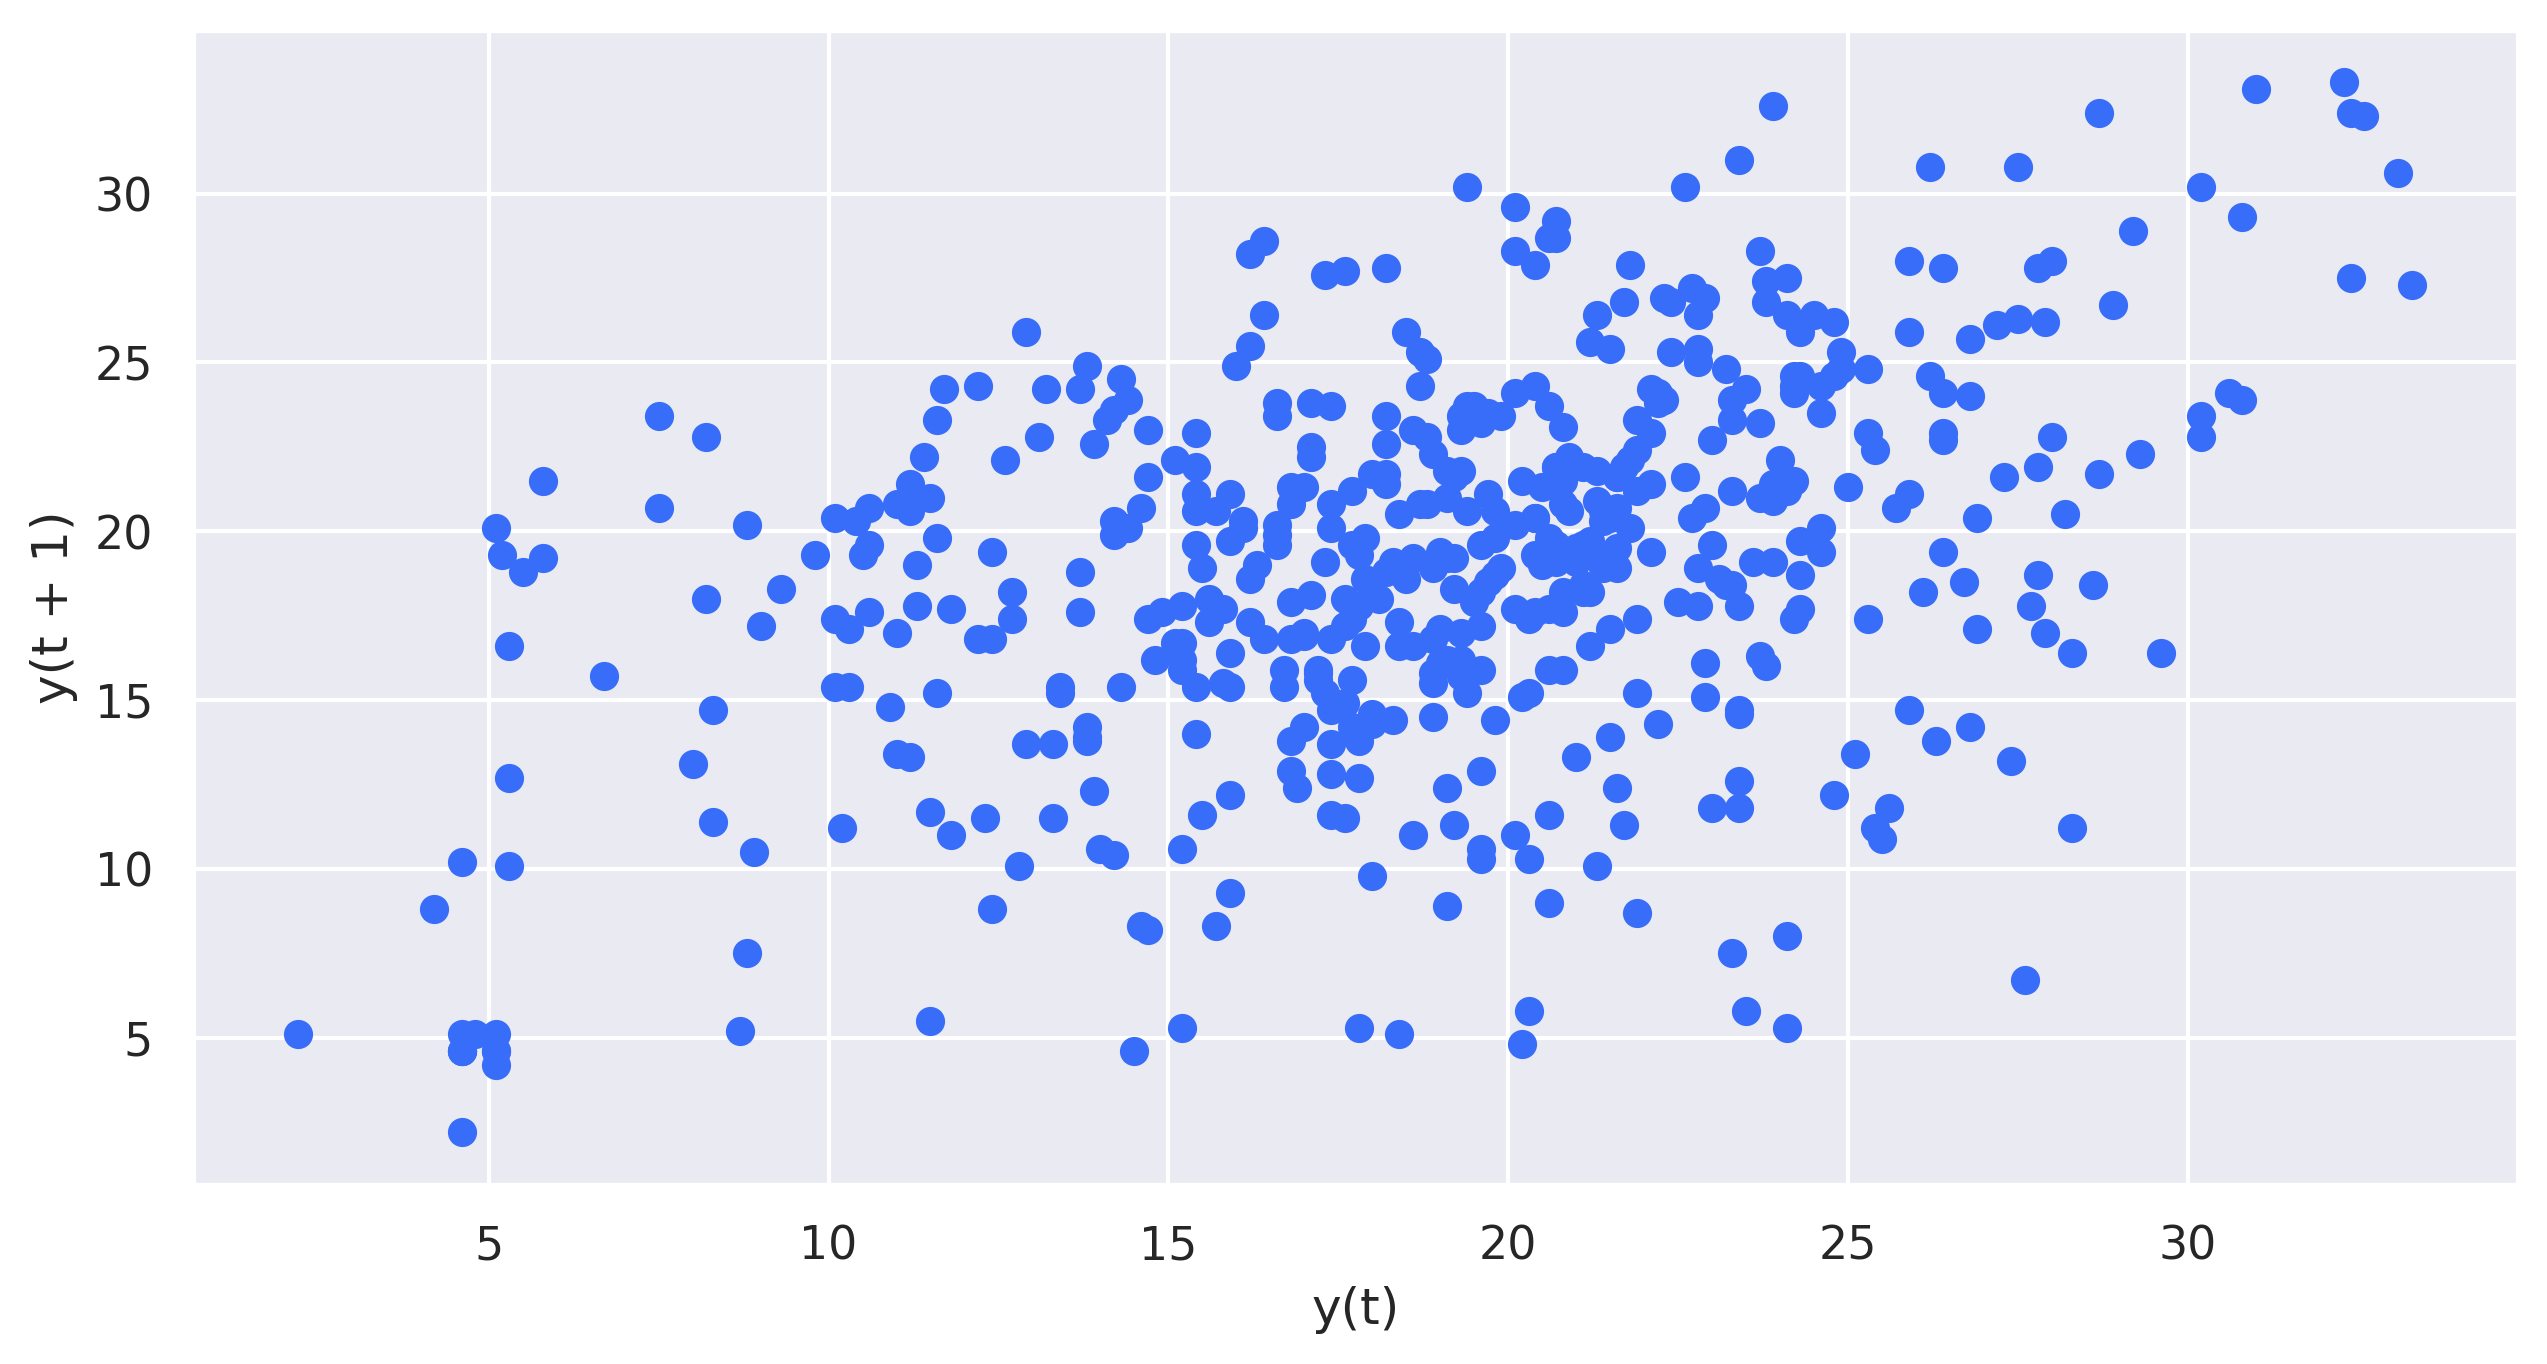

In [28]:
#Lag Plot
from pandas.plotting import lag_plot
lag_plot(df2['temp'])
plt.show()